Shape of the dataset: (254358, 28)
Columns in the dataset: ['SK_ID_CURR', 'TARGET', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'OCCUPATION_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AGE', 'AMT_CREDIT_SUM_sum', 'AMT_CREDIT_SUM_DEBT_sum', 'AMT_CREDIT_SUM_OVERDUE_max', 'CREDIT_DAY_OVERDUE_max', 'CNT_CREDIT_PROLONG_sum', 'CREDIT_ACTIVE_Active', 'CREDIT_ACTIVE_Closed', 'CREDIT_TYPE_Consumer credit', 'CREDIT_TYPE_Credit card', 'CREDIT_TYPE_Microloan', 'CREDIT_TYPE_Unknown type of loan', 'CREDIT_TYPE_Another type of loan', 'DEBT_RATIO', 'OVERDUE_RATIO']
Cleaned YEARS_EMPLOYED:
0    3.254795
1    0.616438
2    8.326027
3    8.323288
4    4.350685
Name: YEARS_EMPLOYED, dtype: float64


/Users/mayaung/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mayaung/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


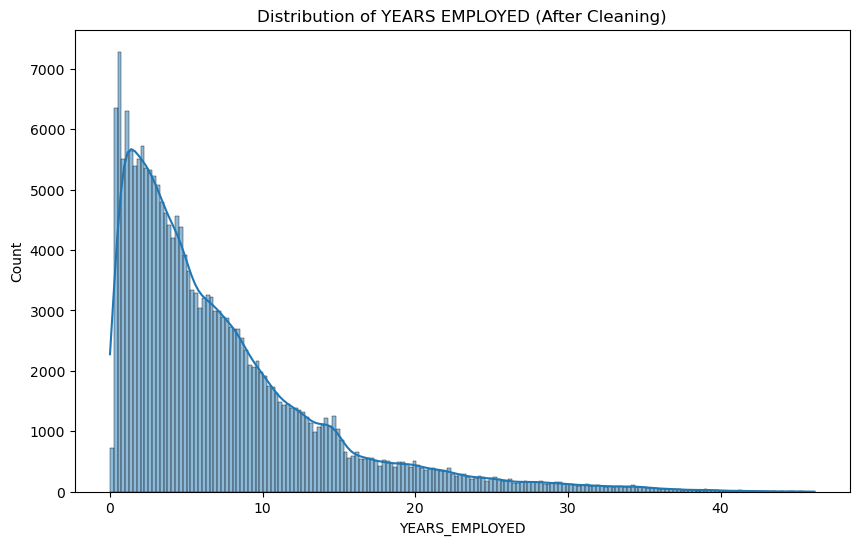

Dataset after dropping DAYS_EMPLOYED column:
   SK_ID_CURR  TARGET NAME_INCOME_TYPE    NAME_FAMILY_STATUS  CNT_CHILDREN  \
0      100003       0    State servant               Married             0   
1      100004       0          Working  Single / not married             0   
2      100006       0          Working        Civil marriage             0   
3      100007       0          Working  Single / not married             0   
4      100008       0    State servant               Married             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE OCCUPATION_TYPE  \
0          270000.0   1293502.5      35698.5        1129500.0      Core staff   
1           67500.0    135000.0       6750.0         135000.0        Laborers   
2          135000.0    312682.5      29686.5         297000.0        Laborers   
3          121500.0    513000.0      21865.5         513000.0      Core staff   
4           99000.0    490495.5      27517.5         454500.0        Laborers   


,SK_ID_CURR,TARGET,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,OCCUPATION_TYPE,...,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Closed,CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Microloan,CREDIT_TYPE_Unknown type of loan,CREDIT_TYPE_Another type of loan,DEBT_RATIO,OVERDUE_RATIO,YEARS_EMPLOYED
0,100003,0,State servant,Married,0,270000.0,1293502.5,35698.5,1129500.0,Core staff,...,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.254795
1,100004,0,Working,Single / not married,0,67500.0,135000.0,6750.0,135000.0,Laborers,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.616438
2,100006,0,Working,Civil marriage,0,135000.0,312682.5,29686.5,297000.0,Laborers,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.326027
3,100007,0,Working,Single / not married,0,121500.0,513000.0,21865.5,513000.0,Core staff,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.323288
4,100008,0,State servant,Married,0,99000.0,490495.5,27517.5,454500.0,Laborers,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.350685


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scorecardpy as sc

# Load the dataset
df = pd.read_csv("merged_applicant_and_bureau_cleaned.csv")

# Check the shape and basic info of the dataset
print(f"Shape of the dataset: {df.shape}")
print(f"Columns in the dataset: {df.columns.tolist()}")

# --- CLEANING for DAYS_EMPLOYED ---
# Convert negative values to positive and then divide by 365 to convert to years
# We're turning DAYS_EMPLOYED into a numerical variable, not categorizing it
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: abs(x) / 365 if x < 0 else x / 365)

# Replace -365243 (a placeholder for no employment) with 0 (no employment)
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].replace([365243], 0)

# Ensure DAYS_EMPLOYED is a numerical variable (in years)
df['YEARS_EMPLOYED'] = df['DAYS_EMPLOYED']

# Check the cleaned data
print(f"Cleaned YEARS_EMPLOYED:\n{df['YEARS_EMPLOYED'].head()}")

# Optional: Visualize the distribution of YEARS_EMPLOYED after cleaning
plt.figure(figsize=(10, 6))
sns.histplot(df['YEARS_EMPLOYED'], kde=True)
plt.title("Distribution of YEARS EMPLOYED (After Cleaning)")  # Updated title to reflect years
plt.show()

# --- Drop the DAYS_EMPLOYED column ---
df = df.drop(columns=['DAYS_EMPLOYED'])

# Check the final dataset after dropping DAYS_EMPLOYED
print(f"Dataset after dropping DAYS_EMPLOYED column:\n{df.head()}")


df.head()

In [ ]:
df.shape